***
***

<br><h1>MACHINE LEARNING : ASSIGNMENT 1</h1>
<h4>MV SHIVAANI - COHORT 3</h4>

***
***

<h2>INTRODUCTION</h2>
<h3>Apprentice Chef Company</h3><br>
<strong>About the company:</strong> A 3 year-old SF based startup giving a unique spin to home cooking for busy professionals<br>

<strong>ITEMS OFFERED :</strong> <br>

<strong>Meal sets</strong> ( price range 10USD to 23USD) consisting of choice of protein, veggies, carbs and seasoning.<br>
<strong>Beverages</strong> (can be ordered only with meal sets) (price range 1USD to  25USD), includes half bottle wine can only be ordered if more than 21 years age

<strong>SPECIAL PLANS:</strong>
- <strong> Weekly plan: </strong> <br>
Total 3 meals => 10% discount<br>
Total 5 meals => 20% discount
- <strong> Halfway there:</strong>  <BR>
Deliver half a bottle wine every Wednesday

<strong>BACKGROUND </strong><br><br>
The company earns 90% of its revenue from customers who have been ordering meal sets for 12 months or less.<br><br>
With increasing competition from other Meal-Kit startups like 'Home Chef', 'Blue Apron', etc. it is becoming increasingly important for 'Apprentice Chef' to understand their drivers of revenue, their USP and their  refine target audience and enhance their reach through innovative marketing strategies. 


<strong> OBJECTIVE </strong> <br>
To understand how much <strong>REVENUE</strong> to expect from each customer within their first year of
orders.

<STRONG>DATA</STRONG>
- Sample of 2000 customers:<br>
• at least one purchase per month for a total of 11 of their first 12 months<br>
• at least one purchase per quarter and at least 15 purchases throughout their first yearat least one purchase per month for a total of 11 of their first 12 months

***
<strong><h2>METHODLOGY</h2></strong>

<h3>Data Preprocessing </h3><br>
-Importing Libraries<br>
-Exploring Data

In [1]:
from datetime import datetime
start_time = datetime.now()

In [2]:
##Importing libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # linear regression (statsmodels)

import sklearn.linear_model # linear models
from  sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.ensemble import GradientBoostingRegressor



In [3]:
##Reading the file in Python

file= 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)
my_data=original_df

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
PC_LOGINS                       1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
W

In [5]:
## Filling in Missing values in FAMILY_NAME

my_data['FAMILY_NAME'].fillna("Unknown", inplace = True) 

In [6]:
my_data.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


<h3>Visual Exploratory Data Analyis</h3><br>

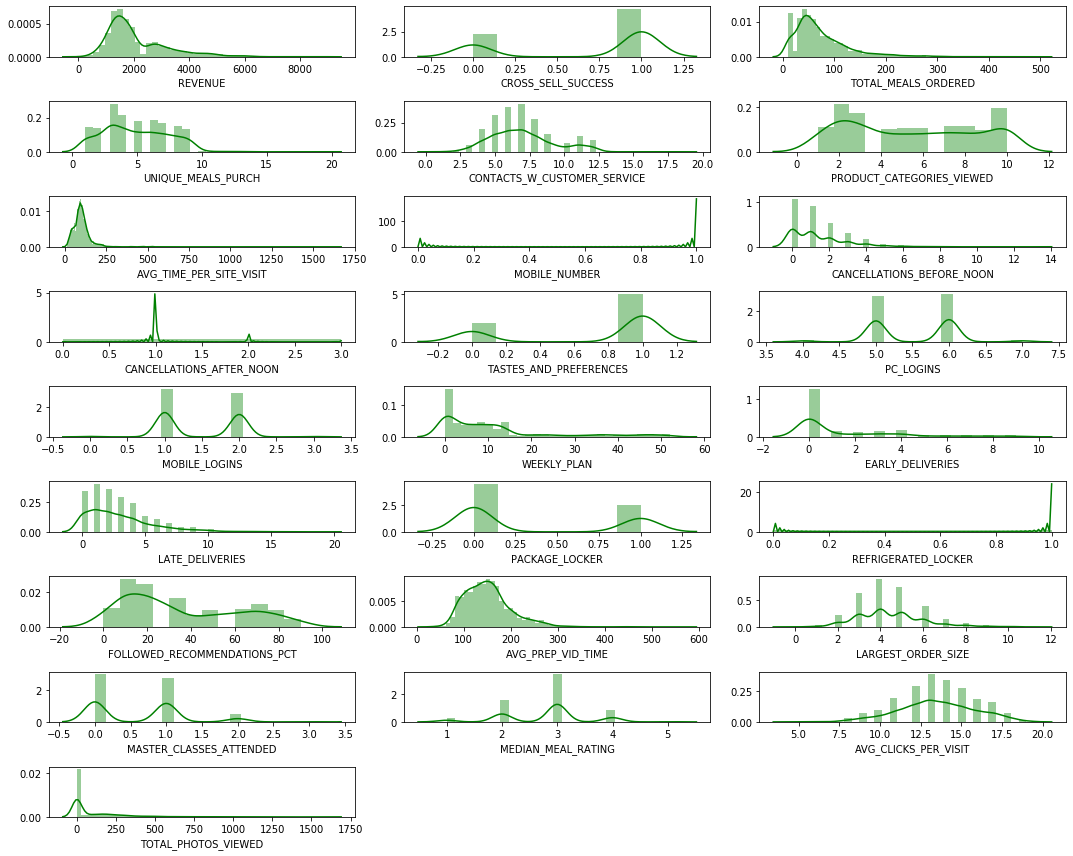

In [7]:
## Get the histogram of different variables using the loop over all the features
"""
  Plot the histogram of the feature inside the my_data dataframe
"""
def eda_histogram (name, row, col, i):
    plt.subplot(row, col, i)
    sns.distplot(a= my_data[name],
             bins  = 'fd',
             color = 'g')

total_plots = []
for name in my_data.columns:
    if my_data[name].dtype == float or my_data[name].dtype == int:
        total_plots.append(name)

fig, ax = plt.subplots(figsize = (15, 12))
row, col = len(total_plots)/3 + 1, 3
for i in range(len(total_plots)):
    eda_histogram(total_plots[i], row, col, i+1)
plt.tight_layout()
plt.show()
########################

***
<h3><strong>Setting outlier thresholds and developing features  based on those thresholds<strong></h3>  

In [8]:
# setting outlier thresholds based on visual EDA above
TOTAL_MEALS_ORDERED_HI  = 280
UNIQUE_MEALS_PURCH_HI  = 3.5 
UNIQUE_MEALS_PURCH_LO = 2.5
CONTACTS_W_CUSTOMER_SERVICE_HI  = 10
CONTACTS_W_CUSTOMER_SERVICE_LO = 2.5
PRODUCT_CATEGORIES_VIEWED_HI= 2
AVG_TIME_PER_SITE_VISIT_HI  = 190
CANCELLATIONS_BEFORE_NOON_HI = 4
CANCELLATIONS_BEFORE_NOON_LO= 0
CANCELLATIONS_AFTER_NOON_LO = 0
WEEKLY_PLAN_HI = 30
EARLY_DELIVERIES_HI = 6
EARLY_DELIVERIES_LO = 0
LATE_DELIVERIES_HI = 8
LATE_DELIVERIES_LO = 0
PC_LOGINS_OUT = 0
MOBILE_LOGINS_OUT = 0
FOLLOWED_RECOMMENDATIONS_PCT_OUT=0
AVG_PREP_VID_TIME_HI = 280
LARGEST_ORDER_SIZE_HI = 8
LARGEST_ORDER_SIZE_OUT = 4
MASTER_CLASSES_ATTENDED_OUT = 0
MASTER_CLASSES_ATTENDED_HI =  2.5
MEDIAN_MEAL_RATING_HI = 4
AVG_CLICKS_PER_VISIT_LO = 8
TOTAL_PHOTOS_VIEWED_HI = 500

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
my_data['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi = my_data.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][my_data['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

my_data['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
#UNIQUE_MEALS_PURCH
my_data['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi = my_data.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][my_data['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]
condition_lo= my_data.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][my_data['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_LO]
my_data['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
my_data['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = my_data.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_data['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]
condition_lo = my_data.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_data['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_LO]

my_data['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

my_data['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#AVG_TIME_PER_SITE_VISIT
my_data['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = my_data.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][my_data['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

my_data['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_BEFORE_NOON 
my_data['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = my_data.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][my_data['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]

my_data['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_CANCELLATIONS_BEFORE_NOON_LO'] = 0
condition_hi = my_data.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON_LO'][my_data['CANCELLATIONS_BEFORE_NOON'] == CANCELLATIONS_BEFORE_NOON_LO]

my_data['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_AFTER_NOON
my_data['OUT_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = my_data.loc[0:,'OUT_CANCELLATIONS_AFTER_NOON'][my_data['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_LO]

my_data['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#PC_LOGINS
my_data['OUT_PC_LOGINS'] = 0
condition_hi = my_data.loc[0:,'OUT_PC_LOGINS'][my_data['PC_LOGINS'] == PC_LOGINS_OUT]

my_data['OUT_PC_LOGINS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
#MOBILE_LOGINS
my_data['OUT_MOBILE_LOGINS'] = 0
condition_hi = my_data.loc[0:,'OUT_MOBILE_LOGINS'][my_data['MOBILE_LOGINS'] == MOBILE_LOGINS_OUT]

my_data['OUT_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
#WEEKLY_PLAN
my_data['OUT_WEEKLY_PLAN'] = 0
condition_hi = my_data.loc[0:,'OUT_WEEKLY_PLAN'][my_data['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

my_data['OUT_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#EARLY_DELIVERIES
my_data['OUT_EARLY_DELIVERIES'] = 0
condition_hi = my_data.loc[0:,'OUT_EARLY_DELIVERIES'][my_data['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

my_data['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_EARLY_DELIVERIES_LO'] = 0
condition_hi = my_data.loc[0:,'OUT_EARLY_DELIVERIES_LO'][my_data['EARLY_DELIVERIES'] == EARLY_DELIVERIES_LO]

my_data['OUT_EARLY_DELIVERIES_LO'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#LATE_DELIVERIES
my_data['OUT_LATE_DELIVERIES'] = 0
condition_hi = my_data.loc[0:,'OUT_LATE_DELIVERIES'][my_data['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

my_data['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_LATE_DELIVERIES_LO'] = 0
condition_hi = my_data.loc[0:,'OUT_LATE_DELIVERIES_LO'][my_data['LATE_DELIVERIES'] ==LATE_DELIVERIES_LO]

my_data['OUT_LATE_DELIVERIES_LO'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#OLLOWED_RECOMMENDATIONS_PCT_OUT
my_data['OUT_FOLLOWED_RECOMMENDATIONS_PCT_OUT'] = 0
condition_hi = my_data.loc[0:,'OUT_FOLLOWED_RECOMMENDATIONS_PCT_OUT'][my_data['FOLLOWED_RECOMMENDATIONS_PCT'] == FOLLOWED_RECOMMENDATIONS_PCT_OUT]

my_data['OUT_FOLLOWED_RECOMMENDATIONS_PCT_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#AVG_PREP_VID_TIME
my_data['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi = my_data.loc[0:,'OUT_AVG_PREP_VID_TIME'][my_data['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

my_data['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#LARGEST_ORDER_SIZE
my_data['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi = my_data.loc[0:,'OUT_LARGEST_ORDER_SIZE'][my_data['LARGEST_ORDER_SIZE'] >LARGEST_ORDER_SIZE_HI]

my_data['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_LARGEST_ORDER_SIZE_OUT'] = 0
condition_hi = my_data.loc[0:,'OUT_LARGEST_ORDER_SIZE_OUT'][my_data['LARGEST_ORDER_SIZE'] == LARGEST_ORDER_SIZE_OUT]

my_data['OUT_LARGEST_ORDER_SIZE_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


#MASTER_CLASSES_ATTENDED
my_data['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = my_data.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][my_data['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

my_data['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_data['OUT_MASTER_CLASSES_ATTENDED_OUT'] = 0
condition_hi = my_data.loc[0:,'OUT_MASTER_CLASSES_ATTENDED_OUT'][my_data['MASTER_CLASSES_ATTENDED'] == MASTER_CLASSES_ATTENDED_OUT]

my_data['OUT_MASTER_CLASSES_ATTENDED_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#MEDIAN_MEAL_RATING
my_data['OUT_MEDIAN_MEAL_RATING'] = 0
condition_hi = my_data.loc[0:,'OUT_MEDIAN_MEAL_RATING'][my_data['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_HI]

my_data['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#AVG_CLICKS_PER_VISIT
my_data['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = my_data.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][my_data['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_LO]

my_data['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#TOTAL_PHOTOS_VIEWED
my_data['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = my_data.loc[0:,'TOTAL_PHOTOS_VIEWED'][my_data['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI]

my_data['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


<h3><strong>Additonal Visual EDA and Creation of  trend based features<strong></h3>

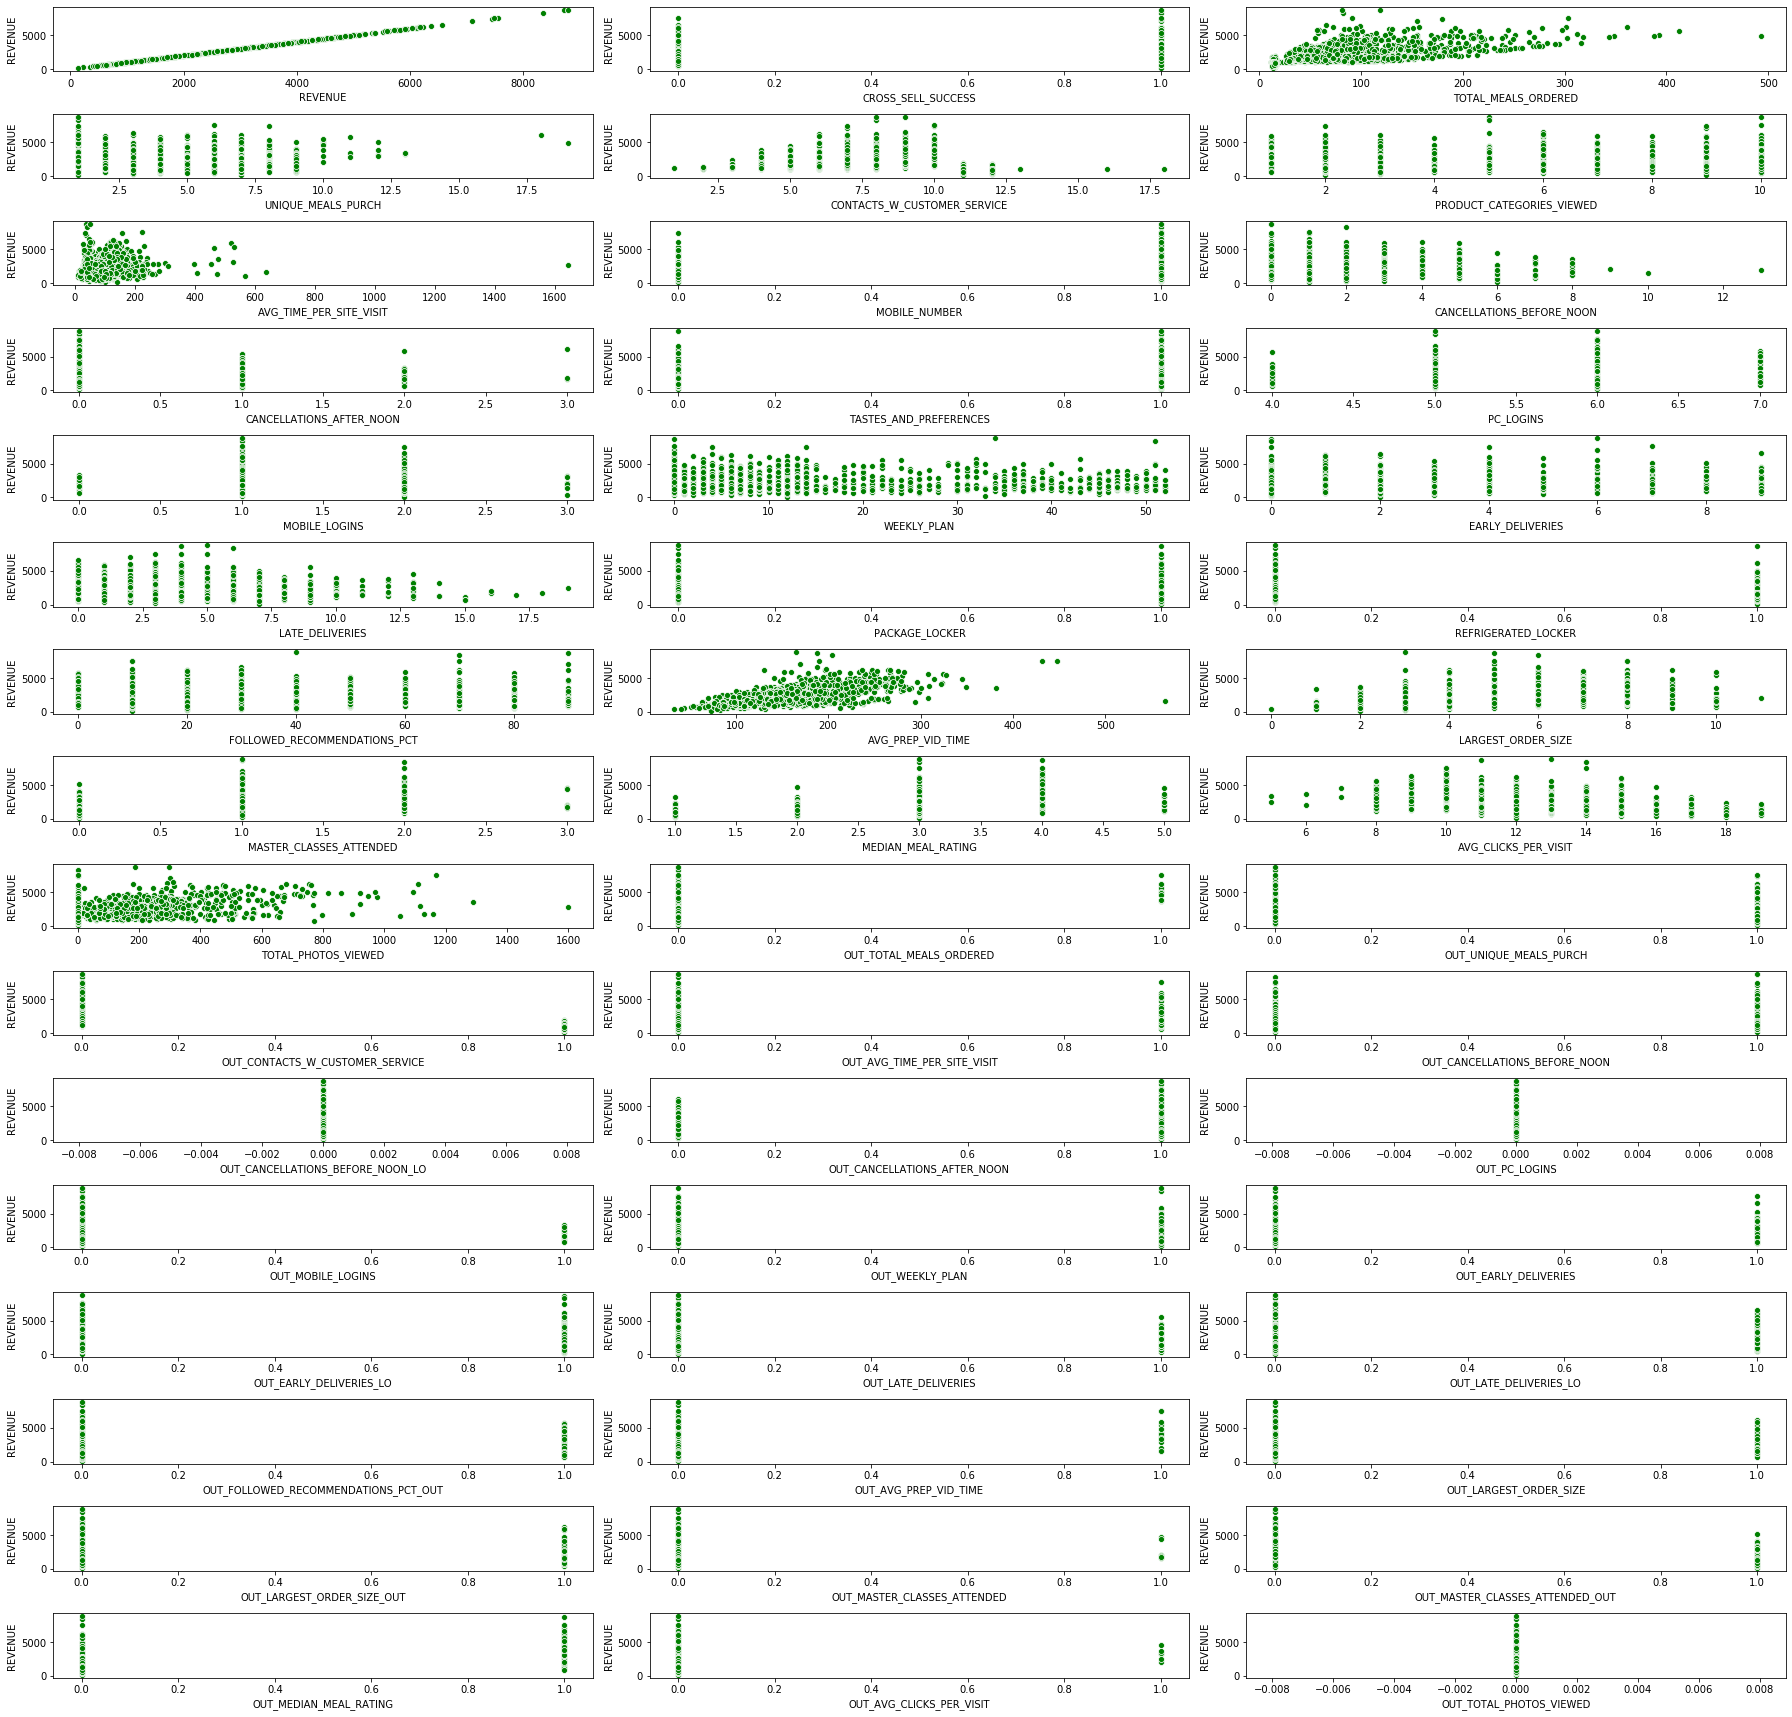

In [9]:
########################
# Visual EDA (Scatterplots)
########################
"""
  Plot the scatter plot of the feature inside the my_data dataframe with revenue which is our dependent variable
"""
def eda_scatterplot(name, row, col, i):
    plt.subplot(row, col, i)
    sns.scatterplot(x = my_data[name],
                    y = my_data['REVENUE'],
                    color = 'g')
    plt.xlabel(name)

total_plots = []
for name in my_data.columns:
    if (my_data[name].dtype == float or my_data[name].dtype == int):
        total_plots.append(name)

fig, ax = plt.subplots(figsize = (25, 25))
row, col = len(total_plots)/3 + 1, 3
for i in range(len(total_plots)):
    eda_scatterplot(total_plots[i], row, col, i+1)
plt.tight_layout()
plt.show()
########################

In [10]:
## setting trend-based thresholds based on scatterplots plotted above

UNIQUE_MEALS_PURCH_AT  = 1.5 # less
CONTACTS_W_CUSTOMER_SERVICE_AT  = 10.5 # less
PRODUCT_CATEGORIES_VIEWED_AT = 5.5  # less
AVG_TIME_PER_SITE_VISIT_AT  = 300  # less
PC_LOGINS_AT = 6.5  # less
MOBILE_LOGINS_AT= 1.5 # less
WEEKLY_PLAN_AT = 15   # less
FOLLOWED_RECOMMENDATIONS_PCT_AT1= 35 # less
AVG_PREP_VID_TIME = 200 #less
LARGEST_ORDER_SIZE_AT = 5.5 # less
AVG_CLICKS_PER_VISIT_AT1 = 10.5 
TOTAL_PHOTOS_VIEWED_AT = 0.5 # less
MASTER_CLASSES_ATTENDED_AT = 2.5 #less
MEDIAN_MEAL_RATING_AT = 4  #less
TOTAL_PHOTOS_VIEWED_AT1 =0.5 #less

In [11]:
##Creating a function to develop features based on trend threshold set above
"""
Create an addition column inside the my_data dataframe with the inflextion point as specified using val variable
"""
def create_change_at_col(name, val):
    my_data['CHANGE_'+name] = 0
    condition = my_data.loc[0:,'CHANGE_'+name][my_data[name] < val]

    my_data['CHANGE_'+name].replace(to_replace = condition,
                                         value      = 1,
                                         inplace    = True)

In [12]:
## Creating features based on trend based thresholds
create_change_at_col("UNIQUE_MEALS_PURCH", UNIQUE_MEALS_PURCH_AT)
create_change_at_col("CONTACTS_W_CUSTOMER_SERVICE", CONTACTS_W_CUSTOMER_SERVICE_AT)
create_change_at_col("PRODUCT_CATEGORIES_VIEWED", PRODUCT_CATEGORIES_VIEWED_AT)
create_change_at_col("AVG_TIME_PER_SITE_VISIT", AVG_TIME_PER_SITE_VISIT_AT)
create_change_at_col("PC_LOGINS", PC_LOGINS_AT)
create_change_at_col("MOBILE_LOGINS", MOBILE_LOGINS_AT)
create_change_at_col("WEEKLY_PLAN", WEEKLY_PLAN_AT)
create_change_at_col("FOLLOWED_RECOMMENDATIONS_PCT", FOLLOWED_RECOMMENDATIONS_PCT_AT1)
create_change_at_col("AVG_PREP_VID_TIME", AVG_PREP_VID_TIME)
create_change_at_col("LARGEST_ORDER_SIZE", LARGEST_ORDER_SIZE_AT)
create_change_at_col("AVG_CLICKS_PER_VISIT", AVG_CLICKS_PER_VISIT_AT1)
create_change_at_col("TOTAL_PHOTOS_VIEWED", TOTAL_PHOTOS_VIEWED_AT)
create_change_at_col("MASTER_CLASSES_ATTENDED", MASTER_CLASSES_ATTENDED_AT)
create_change_at_col("MEDIAN_MEAL_RATING", MEDIAN_MEAL_RATING_AT)
create_change_at_col("TOTAL_PHOTOS_VIEWED", TOTAL_PHOTOS_VIEWED_AT1)

<h3>Creating additional features based on:<br></h3>
    <h4>-Interactions<br></h4>
    <h4>-Combinations<br></h4>
    <h4>-Transformation<br></h4>
    

In [13]:

## Creating interaction terms based on theoretical rationale

# Interaction of subscription to weekly plan and total meals ordered
my_data['PLAN_MEALS']= my_data['WEEKLY_PLAN'] * my_data['TOTAL_MEALS_ORDERED']

#Interaction of contacts to customer service and product categories viewed
my_data['CSPCVIEWED']= my_data['CONTACTS_W_CUSTOMER_SERVICE'] * my_data['PRODUCT_CATEGORIES_VIEWED']

#Interaction of average time per visit and product categories viewed
my_data['TIME_VIEWED']= my_data['AVG_TIME_PER_SITE_VISIT'] * my_data['PRODUCT_CATEGORIES_VIEWED']

#Interaction of subscription to weekly plans and unique meals purchased; 
# AS the relationship with revenue seemed non-linear, tranfromed to form 1/X
my_data['PLAN_UNIQUE'] = 1.0/(1+(my_data['WEEKLY_PLAN'] * my_data['UNIQUE_MEALS_PURCH']))

#Interaction of fact wether person fille din his preferneces and unique meals ordered
my_data['TASTE_UNIQUE'] = my_data['TASTES_AND_PREFERENCES'] * my_data['UNIQUE_MEALS_PURCH']

#Interaction of subsscription to both weekly plan and halfway there
my_data['BOTH_PLANS']= my_data['WEEKLY_PLAN']*my_data['CROSS_SELL_SUCCESS']

#Interaction of median meal rating and numbe rof unique meals purchased
my_data['UNIQUE_MEALS_X_RATING'] = my_data['MEDIAN_MEAL_RATING'] * my_data['UNIQUE_MEALS_PURCH']
my_data['UNIQUE_PURCH_BINARY']=(my_data['UNIQUE_MEALS_PURCH']>1).astype(int)
my_data['UNIQUE_BINARY_X_RATING']= my_data['UNIQUE_PURCH_BINARY']*my_data['MEDIAN_MEAL_RATING']

#Interaction of median meal rating and average time spent watching prep vide
my_data['RATING_X_PREPTIME'] = my_data['MEDIAN_MEAL_RATING'] * my_data['AVG_PREP_VID_TIME']

#Interaction of subscription to both plans (weekly an halfway ) and melas ordered
my_data['BOTH_PLANS_ORDERS']= my_data['BOTH_PLANS'] * my_data['TOTAL_MEALS_ORDERED']

#Interaction of fact that preferences was filled  and recommendations followed
my_data['PREFERENCE_X_RECOMMENDATION']= my_data['FOLLOWED_RECOMMENDATIONS_PCT'] * my_data['TASTES_AND_PREFERENCES']

# To capture number of times customer service was contacted per meal ordered
my_data['AVERAGE_CUST_HELP'] = my_data['CONTACTS_W_CUSTOMER_SERVICE'] / my_data['TOTAL_MEALS_ORDERED']
#Interaction of average customer help and average time per visit
my_data['AVG_TIME_AVG_CUST_SERVICE']= my_data['AVERAGE_CUST_HELP']*my_data['AVG_TIME_PER_SITE_VISIT']



############ Creating combination variables based on theoretical rationale ################## 

#To understand repetitive buying behaviour
my_data['UNIQUE_TOTAL']= my_data['TOTAL_MEALS_ORDERED']/my_data['UNIQUE_MEALS_PURCH']

#To capture relationship between meals ordered and logins
my_data['ORDERS_PER_LOGIN']= my_data['TOTAL_MEALS_ORDERED']/(1+my_data['MOBILE_LOGINS']+my_data['PC_LOGINS'])

#To capture proportion of cancellations to meals ordered
#As the relationship with revenue seemed non-linear, 1/X is taken
my_data['AVERAGE_CANCELLATION'] =1.0/(1+((my_data['CANCELLATIONS_BEFORE_NOON'] + my_data['CANCELLATIONS_AFTER_NOON'])/ my_data['TOTAL_MEALS_ORDERED']))

#To capture wether customers order using mobile or pc
my_data['PC_PERCENT'] = my_data['PC_LOGINS'] /(my_data['PC_LOGINS'] + my_data['MOBILE_LOGINS'])

# To capture delivery efficiency
my_data['EARLY_DELIVERY_PCT'] = 1.0/(1+(my_data['EARLY_DELIVERIES'] / my_data['TOTAL_MEALS_ORDERED']))

#To capture delivery inefficiency
my_data['LATE_DELIVERY_PCT'] = 1.0/(1+(my_data['LATE_DELIVERIES'] / my_data['TOTAL_MEALS_ORDERED']))

# Subscription to Weekly meal plans means ordering either 3 or 5 meals/week, so avergae 4 meals
# Proportion of total meals ordered due to this subscriptuon by taking average of 4
# Non-linear relationship hence, 1/X
my_data['MEALS_DUE_TO_WEEKLY_PLAN']=1.0/(1+(4* my_data['WEEKLY_PLAN'])/ my_data['TOTAL_MEALS_ORDERED'])

#Checking for people who fill same first and last name
my_data['FIRST_NAME_EQ_LASTNAME'] = (my_data['FIRST_NAME'] == my_data['FAMILY_NAME']).astype(int)

# Some people seemed to have ordered their most number of meals in a single order, capturing that behaviour.
# Non-linear relationship hence, 1/X
my_data['PROPORTION_FROM_LARGEST_ORDER']= 1/(1+(my_data['LARGEST_ORDER_SIZE']/my_data['TOTAL_MEALS_ORDERED']))


####### Transforming variables ##########################
my_data['LOGREVENUE']=np.log(my_data['REVENUE'])
my_data['LOGTOTAL_MEALS_ORDERED']=np.log(my_data['TOTAL_MEALS_ORDERED'])
my_data['AVERAGE_MEALS_PER_WEEK']= my_data['TOTAL_MEALS_ORDERED']/52


<h4> Creating features based on email as dummy variables (3 different categories depending on the email being personal, company or junk)</h4>

In [14]:
# We will extract the domain from the emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in my_data.iterrows():
    # splitting email domain at '@'
    split_email = my_data.loc[index, 'EMAIL'].split('@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# renaming column to concatenate
email_df.columns = ['NAME' , 'EMAIL_DOMAIN']

# concatenating personal_email_domain with friends DataFrame
my_data = pd.concat([my_data, email_df['EMAIL_DOMAIN']], axis = 1)

In [15]:
personal_email_domains = ['@gmail.com', '@protonmail.com','@yahoo.com']
company_email_domains  = ['@homedepot.com','@intel.com','@unitedtech.com',
                          '@cisco.com','@goldmansacs.com','@jpmorgan.com',
                          '@visa.com','@pfizer.com','@walmart.com','@disney.com',
                          '@mmm.com','@verizon.com','@pg.com','@caterpillar.com',
                          '@boeing.com','@travelers.com','@exxon.com','@unitedhealth.com',
                          '@chevron.com','@microsoft.com','@ge.org','@ibm.com','@dupont.com',
                          '@apple.com','@nike.com','@jnj.com','@merck.com',
                          '@mcdonalds.com','@cocacola.com','@amex.com']
junk_email_domains     = ['@msn.com','@aol.com','@passport.com','@hotmail.com',
                          '@live.com','@me.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in my_data['EMAIL_DOMAIN']:
        if "@" + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif "@" + domain in company_email_domains:
            placeholder_lst.append('company')
        
        elif "@" + domain in junk_email_domains:
            placeholder_lst.append('junk')
        
        else:
            placeholder_lst.append('unknown')

Preliminary analysis revealed markedly different behavior of customers with domain name' Yahoo', hence creating a separate variable.


In [16]:
# Dummy variable for domain YAHOO!!!

my_data['domain_group'] = pd.Series(placeholder_lst)
# one hot encoding categorical variables
one_hot_mail = pd.get_dummies(my_data['domain_group'])

my_data['IS_YAHOO_DOMAIN'] = (my_data['EMAIL_DOMAIN'] == 'yahoo.com').astype(int)
# dropping categorical variables after they've been encoded
my_data = my_data.drop('domain_group', axis = 1)


# joining codings together
my_data = my_data.join([one_hot_mail])

***
<h3>Feature Selection</h3><br>

* A number of combinations of features were explored and a large number of models were iterated. Consequently, for the final analysis the following variables are selected.<br>

* The variables are selected based on their performance, theoretical importance and statistical theory.
<br>
<br>Example: All interaction variables used in the model are accompanied by their base variables and their corresponding threshold and trend based features.<br> 

* Due to differences in magnitude of Target and Explanatory features, the Target feature- REVENUE is transformed to LOGREVENUE.


In [17]:
# These features were selected after iteration 
# # Drop outliers since they are skewing the training data distribution and confusing the model
my_data = my_data[(my_data['LOGREVENUE'] > 6.3)].reindex()

subset_features = [
    
   'CROSS_SELL_SUCCESS',
    'CONTACTS_W_CUSTOMER_SERVICE',
    'CHANGE_CONTACTS_W_CUSTOMER_SERVICE',
    'OUT_CONTACTS_W_CUSTOMER_SERVICE',
    'AVG_PREP_VID_TIME',
    'OUT_AVG_PREP_VID_TIME',
    'LARGEST_ORDER_SIZE',
    'OUT_LARGEST_ORDER_SIZE',
    'OUT_LARGEST_ORDER_SIZE_OUT',
    'MASTER_CLASSES_ATTENDED',
    'OUT_MASTER_CLASSES_ATTENDED',
    'MEDIAN_MEAL_RATING',
    'OUT_MEDIAN_MEAL_RATING',
    'TOTAL_PHOTOS_VIEWED',
    'OUT_TOTAL_PHOTOS_VIEWED',
    'CHANGE_TOTAL_PHOTOS_VIEWED',
    'UNIQUE_PURCH_BINARY',
    'CHANGE_UNIQUE_MEALS_PURCH',
    'OUT_UNIQUE_MEALS_PURCH',
    'AVERAGE_CUST_HELP',
    'MEALS_DUE_TO_WEEKLY_PLAN',
    'UNIQUE_BINARY_X_RATING',
    'TOTAL_MEALS_ORDERED',
    'OUT_TOTAL_MEALS_ORDERED',
    'IS_YAHOO_DOMAIN',  
    'CHANGE_AVG_PREP_VID_TIME',
    'CHANGE_MASTER_CLASSES_ATTENDED',
    'CHANGE_MEDIAN_MEAL_RATING' ,
    'BOTH_PLANS',
    'PROPORTION_FROM_LARGEST_ORDER',
    'CHANGE_AVG_CLICKS_PER_VISIT'   ,
    'AVG_TIME_AVG_CUST_SERVICE',
    'AVG_TIME_PER_SITE_VISIT'
    
]

my_data_cp = my_data.copy()
my_data = my_data_cp[subset_features + ['LOGREVENUE']].reindex()

<h3>Standardizing the data using MinMax Scaler

In [18]:
# INSTANTIATING a StandardScaler() object
scaler = MinMaxScaler()


# FITTING the scaler with housing_data
scaler.fit(my_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(my_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

#Naming the columns of standarized dataframe
X_scaled_df.columns=my_data.columns


***
<h3>Splitting the data into train and testing sets</h3>

In [19]:
# preparing explanatory variable data
from sklearn.model_selection import train_test_split

# preparing response variable data
my_data_target = X_scaled_df.loc[:,'LOGREVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df.drop(['LOGREVENUE'], axis=1),
            my_data_target,
            test_size = 0.25,
            random_state = 222)

<h3>Model Training and Evaluation</h3>

In [20]:
## Preparing variables to put in model
for val in X_train:
    print(f"my_data_train['{val}'] +")

my_data_train['CROSS_SELL_SUCCESS'] +
my_data_train['CONTACTS_W_CUSTOMER_SERVICE'] +
my_data_train['CHANGE_CONTACTS_W_CUSTOMER_SERVICE'] +
my_data_train['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
my_data_train['AVG_PREP_VID_TIME'] +
my_data_train['OUT_AVG_PREP_VID_TIME'] +
my_data_train['LARGEST_ORDER_SIZE'] +
my_data_train['OUT_LARGEST_ORDER_SIZE'] +
my_data_train['OUT_LARGEST_ORDER_SIZE_OUT'] +
my_data_train['MASTER_CLASSES_ATTENDED'] +
my_data_train['OUT_MASTER_CLASSES_ATTENDED'] +
my_data_train['MEDIAN_MEAL_RATING'] +
my_data_train['OUT_MEDIAN_MEAL_RATING'] +
my_data_train['TOTAL_PHOTOS_VIEWED'] +
my_data_train['OUT_TOTAL_PHOTOS_VIEWED'] +
my_data_train['CHANGE_TOTAL_PHOTOS_VIEWED'] +
my_data_train['UNIQUE_PURCH_BINARY'] +
my_data_train['CHANGE_UNIQUE_MEALS_PURCH'] +
my_data_train['OUT_UNIQUE_MEALS_PURCH'] +
my_data_train['AVERAGE_CUST_HELP'] +
my_data_train['MEALS_DUE_TO_WEEKLY_PLAN'] +
my_data_train['UNIQUE_BINARY_X_RATING'] +
my_data_train['TOTAL_MEALS_ORDERED'] +
my_data_train['OUT_T

<h4><strong>MODEL 1</strong></h4><br>
Building OLS model using statsmodel

In [21]:
# merging X_train and y_train so that they can be used in statsmodels

import statsmodels.formula.api as smf

my_data_train = pd.concat([X_train, y_train], axis = 1)

# Step 1: build a model
lm_best = smf.ols(formula =  """my_data_train['LOGREVENUE'] ~ 
my_data_train['CROSS_SELL_SUCCESS'] +
my_data_train['CONTACTS_W_CUSTOMER_SERVICE'] +
my_data_train['CHANGE_CONTACTS_W_CUSTOMER_SERVICE'] +
my_data_train['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
my_data_train['AVG_PREP_VID_TIME'] +
my_data_train['OUT_AVG_PREP_VID_TIME'] +
my_data_train['LARGEST_ORDER_SIZE'] +
my_data_train['OUT_LARGEST_ORDER_SIZE'] +
my_data_train['OUT_LARGEST_ORDER_SIZE_OUT'] +
my_data_train['MASTER_CLASSES_ATTENDED'] +
my_data_train['OUT_MASTER_CLASSES_ATTENDED'] +
my_data_train['MEDIAN_MEAL_RATING'] +
my_data_train['OUT_MEDIAN_MEAL_RATING'] +
my_data_train['TOTAL_PHOTOS_VIEWED'] +
my_data_train['OUT_TOTAL_PHOTOS_VIEWED'] +
my_data_train['CHANGE_TOTAL_PHOTOS_VIEWED'] +
my_data_train['UNIQUE_PURCH_BINARY'] +
my_data_train['CHANGE_UNIQUE_MEALS_PURCH'] +
my_data_train['OUT_UNIQUE_MEALS_PURCH'] +
my_data_train['AVERAGE_CUST_HELP'] +
my_data_train['MEALS_DUE_TO_WEEKLY_PLAN'] +
my_data_train['UNIQUE_BINARY_X_RATING'] +
my_data_train['TOTAL_MEALS_ORDERED'] +
my_data_train['OUT_TOTAL_MEALS_ORDERED'] +
my_data_train['IS_YAHOO_DOMAIN'] +
my_data_train['CHANGE_AVG_PREP_VID_TIME'] +
my_data_train['CHANGE_MASTER_CLASSES_ATTENDED'] +
my_data_train['CHANGE_MEDIAN_MEAL_RATING'] +
my_data_train['BOTH_PLANS'] +
my_data_train['PROPORTION_FROM_LARGEST_ORDER'] +
my_data_train['CHANGE_AVG_CLICKS_PER_VISIT']+
my_data_train['AVG_TIME_AVG_CUST_SERVICE']+
my_data_train['AVG_TIME_PER_SITE_VISIT']
""", data = my_data_train)

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     my_data_train['LOGREVENUE']   R-squared:                       0.834
Model:                                     OLS   Adj. R-squared:                  0.831
Method:                          Least Squares   F-statistic:                     238.2
Date:                         Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                                 09:27:59   Log-Likelihood:                 1817.2
No. Observations:                         1453   AIC:                            -3572.
Df Residuals:                             1422   BIC:                            -3409.
Df Model:                                   30                                         
Covariance Type:                     nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]


<h4><strong>MODEL 2</strong></h4><br>
Building Ridge Model

In [22]:
ridge_model = sklearn.linear_model.Ridge(alpha=1)

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)
ridge_train_score = ridge_model.score(X_train, y_train).round(3)
ridge_test_score = ridge_model.score(X_test, y_test).round(3)
print('Training Score:', ridge_train_score)
print('Testing Score:', ridge_test_score)

Training Score: 0.831
Testing Score: 0.825


<h4><strong>MODEL 3</strong></h4><br>
Building Elastic model

In [23]:
elastic_model = sklearn.linear_model.ElasticNetCV(cv=3)

# FITTING the training data
elastic_fit = elastic_model.fit(X_train, y_train)
elastic_train_score = elastic_model.score(X_train, y_train).round(3)
elastic_test_score = elastic_model.score(X_test, y_test).round(3)
print('Training Score:', elastic_train_score)
print('Testing Score:', elastic_test_score)

Training Score: 0.833
Testing Score: 0.827


<h4><strong>MODEL 4</strong></h4><br>
Building GradientBoosting Model

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbt = GradientBoostingRegressor(n_estimators = 750, max_depth = 4, random_state=222, learning_rate = 0.01, min_samples_leaf = 35)
gbt.fit(X_train, y_train)
gbt_train_score = gbt.score(X_train, y_train).round(3)
gbt_test_score = gbt.score(X_test, y_test).round(3)
print('Training Score:', gbt_train_score)
print('Testing Score:',  gbt_test_score)

Training Score: 0.896
Testing Score: 0.856


<h4><strong>MODEL 5</strong></h4><br>
Building KNN Model

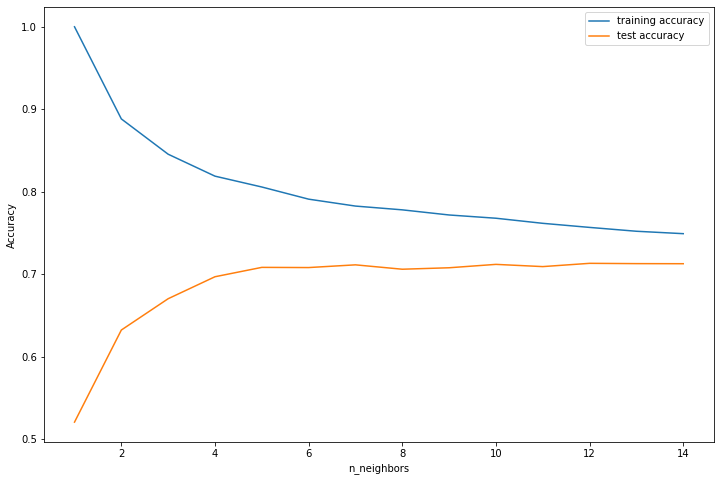

The optimal number of neighbors is 12
Training Score: 0.757
Testing Score: 0.713


In [25]:
# KNN Model

# Step 1: Find optimal k

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []

# building a visualization of 1 to 10 neighbors
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
  
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

# Plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# Finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

# Step 2: INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)

# Step 3: FITTING the model based on the training data
knn_opt.fit(X_train, y_train)

knn_opt_score_train = knn_opt.score(X_train, y_train).round(3)
knn_opt_score_test = knn_opt.score(X_test, y_test).round(3)

# Step 4: SCORING the results
print('Training Score:', knn_opt_score_train)
print('Testing Score:', knn_opt_score_test)

<h2><strong>EVALUATING MODEL PERFORMANCE</strong></h2>

In [26]:
# Model Performance

print(f"""
Model                 Train Score      Test Score
----------------      ----------       ----------

KNN                   {knn_opt_score_train}           {knn_opt_score_test}
Ridge                 {ridge_train_score}           {ridge_test_score}
ElasticNet            {elastic_train_score}           {elastic_test_score}
Gradient Boosting     {gbt_train_score}           {gbt_test_score}

OLS R-Squared = 0.834

The best model is Gradient Boosting.

""")


Model                 Train Score      Test Score
----------------      ----------       ----------

KNN                   0.757           0.713
Ridge                 0.831           0.825
ElasticNet            0.833           0.827
Gradient Boosting     0.896           0.856

OLS R-Squared = 0.834

The best model is Gradient Boosting.




In [27]:
thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
tmin, tsec = divmod(temp_sec, 60)
print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


 Time taken: 0 hours 0 minutes and 25.54 seconds.
